In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

/Users/samenergy/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Define dataset paths
train_dir = "/Users/samenergy/Documents/Projects/PlantDiseaseDetection/Data/train"

valid_dir = "/Users/samenergy/Documents/Projects/PlantDiseaseDetection/Data/valid"


In [3]:
# Load datasets
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir, labels="inferred", label_mode="categorical",
    batch_size=32, image_size=(128, 128), shuffle=True
)

Found 70295 files belonging to 38 classes.


In [4]:
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    valid_dir, labels="inferred", label_mode="categorical",
    batch_size=32, image_size=(128, 128), shuffle=True
)

Found 17572 files belonging to 38 classes.


In [5]:

# Get class names
class_names = train_dataset.class_names
num_classes = len(class_names)
print(f"Number of classes: {num_classes}")
print("Class names:", class_names)

Number of classes: 38
Class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotte

In [6]:
# Normalize images (rescaling to [0,1])
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))

In [7]:
# Define the CNN Model
model = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(128, 128, 3)),
    Conv2D(32, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    Conv2D(64, kernel_size=3, activation='relu', padding='same'),
    Conv2D(64, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    Conv2D(128, kernel_size=3, activation='relu', padding='same'),
    Conv2D(128, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    Conv2D(256, kernel_size=3, activation='relu', padding='same'),
    Conv2D(256, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    Conv2D(512, kernel_size=3, activation='relu', padding='same'),
    Conv2D(512, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    Dropout(0.25),
    Flatten(),
    Dense(1500, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])




/Users/samenergy/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train the model
epochs = 10
history = model.fit(train_dataset, validation_data=valid_dataset, epochs=epochs)


Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1004s 456ms/step - accuracy: 0.2380 - loss: 2.7421 - val_accuracy: 0.7699 - val_loss: 0.7356
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1010s 460ms/step - accuracy: 0.7647 - loss: 0.7414 - val_accuracy: 0.8673 - val_loss: 0.3929
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1017s 463ms/step - accuracy: 0.8607 - loss: 0.4270 - val_accuracy: 0.9035 - val_loss: 0.2900
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1022s 465ms/step - accuracy: 0.9019 - loss: 0.2961 - val_accuracy: 0.9291 - val_loss: 0.2157
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1029s 468ms/step - accuracy: 0.9248 - loss: 0.2253 - val_accuracy: 0.9378 - val_loss: 0.1882
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1042s 474ms/step - accuracy: 0.9416 - loss: 0.1705 - val_accuracy: 0.9431 - val_loss: 0.1750
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1026s 467ms/step - accuracy: 0.9560 - loss: 0.1342 - val_accuracy: 0.9486 - val_loss: 0.1586
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1038s 472ms/s

In [11]:
# Evaluate on training set
train_loss, train_acc = model.evaluate(train_dataset)
print(f"Training Loss: {train_loss}, Training Accuracy: {train_acc}")


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 264s 120ms/step - accuracy: 0.9764 - loss: 0.0683
Training Loss: 0.06256737560033798, Training Accuracy: 0.9788178205490112


In [12]:
# Evaluate on validation set
val_loss, val_acc = model.evaluate(valid_dataset)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")

550/550 ━━━━━━━━━━━━━━━━━━━━ 66s 119ms/step - accuracy: 0.9454 - loss: 0.1765
Validation Loss: 0.17392849922180176, Validation Accuracy: 0.946790337562561


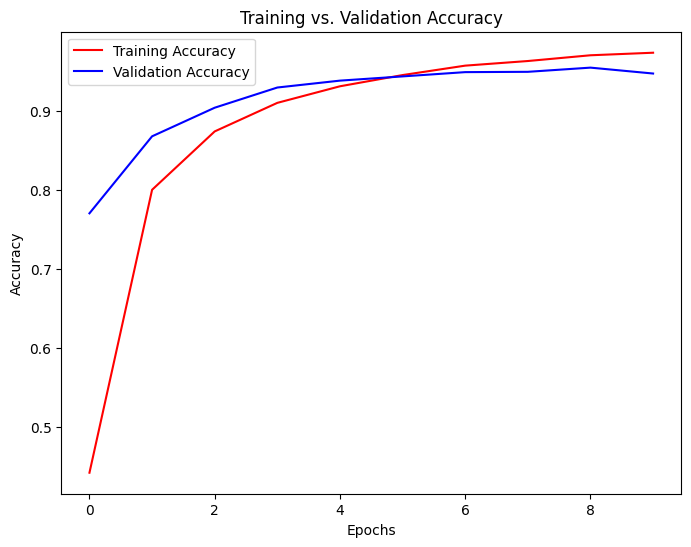

In [13]:
# Plot accuracy
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs. Validation Accuracy")
plt.legend()
plt.show()




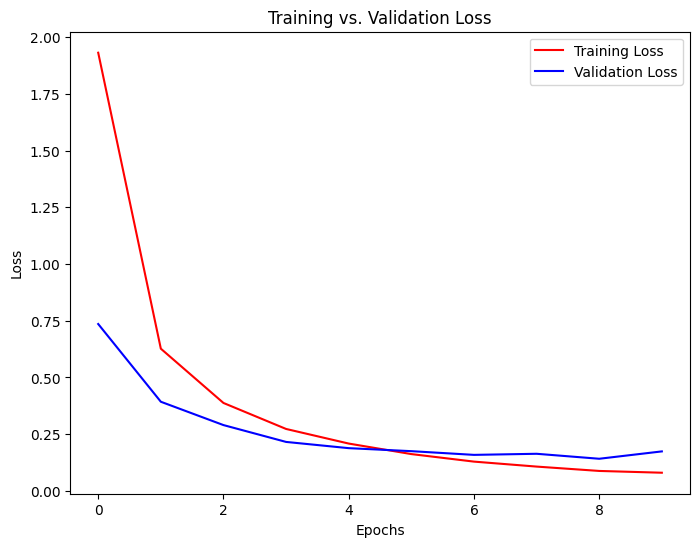

In [14]:
# Plot loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], color='red', label='Training Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs. Validation Loss")
plt.legend()
plt.show()

In [15]:
model.save("plant_disease_model.keras")




In [16]:
import pickle

with open("plant_disease_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [17]:
# Get predictions and true labels
y_true = []
y_pred = []

for images, labels in valid_dataset:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

2025-03-24 04:54:16.502891: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [18]:
# Generate classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.92      0.94       504
                                 Apple___Black_rot       0.94      0.99      0.96       497
                          Apple___Cedar_apple_rust       0.96      0.97      0.96       440
                                   Apple___healthy       0.91      0.97      0.94       502
                               Blueberry___healthy       0.95      0.95      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.92      0.98      0.95       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.88      0.91       410
                       Corn_(maize)___Common_rust_       0.98      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.89      0.97      0.

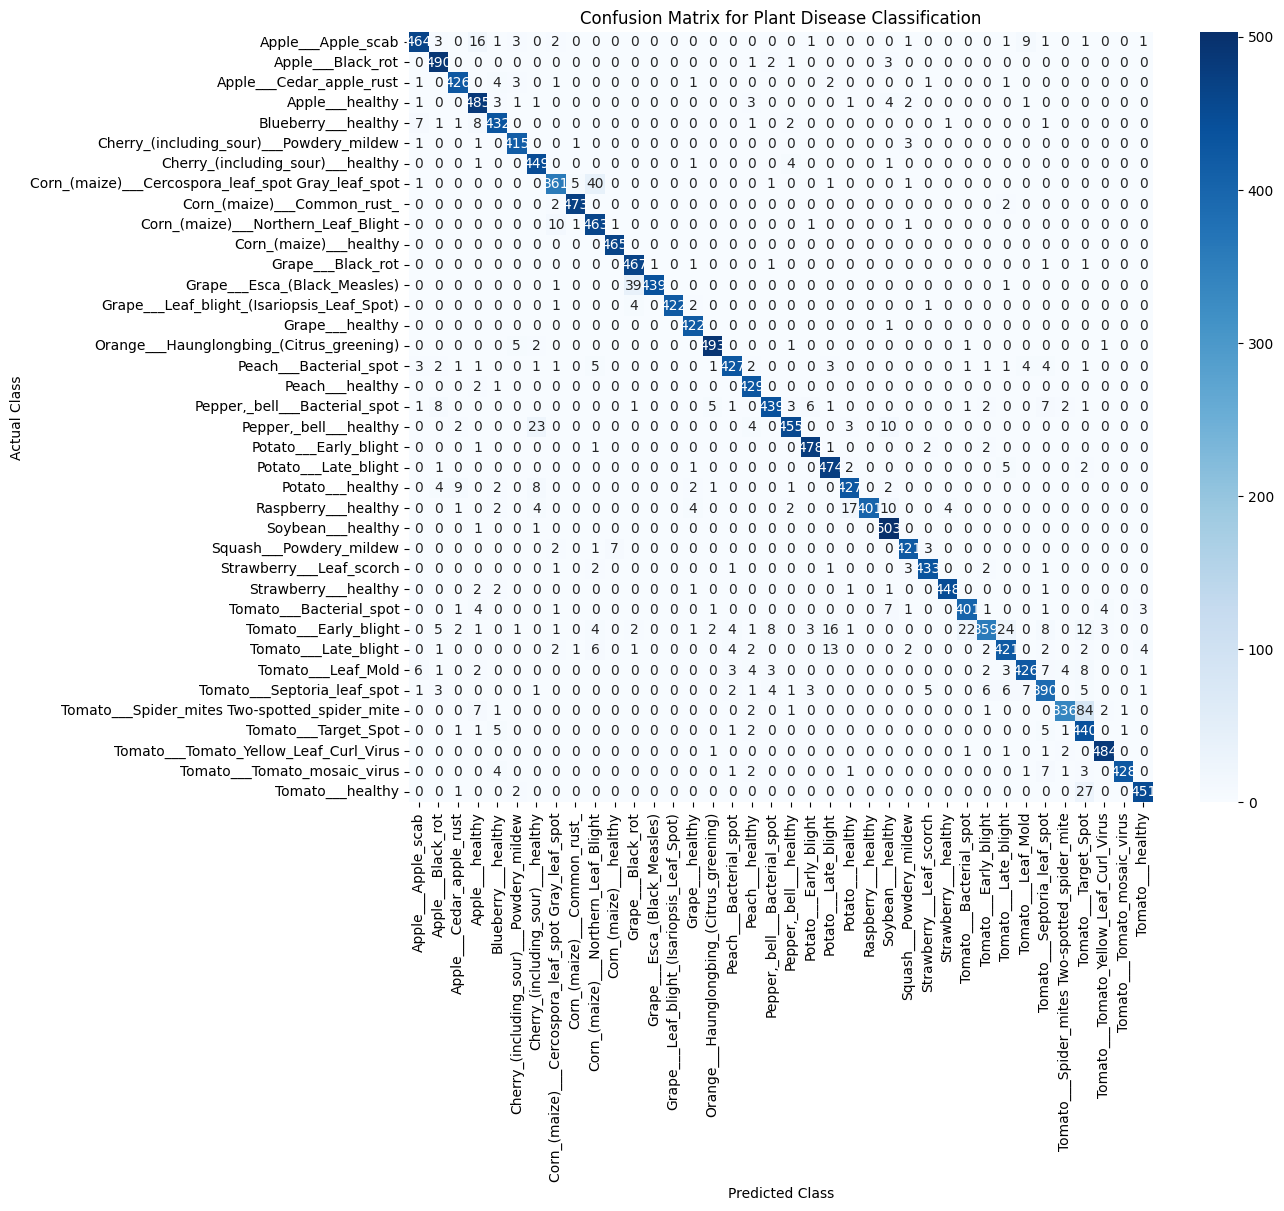

In [19]:
# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix for Plant Disease Classification")
plt.show()